# Polynomial Regression

Polynomial Regression would come in handy when simple linear regression does not fit quite well. 
- Polynomial regression is not a linear regressor. 
    - With linear and non linear regression, it is good to mention that it is not talking about the 'x' variables. 
    - When talking about the class of regression (linear/non-linear), you're focusing on the coefficients. 
    - To find out whether it is linear regression, ask yourself **_"Is this function expressed as a linear combination of these unknown coefficients?"_**
    - My goal is basically to find these coefficients their actual value so I can use these coefficients to plug in X, and predict Y. 

# Business Problem 
A HR team working for a big company and need to make an offer to this new employee. 
- He has 20 years of experience and earning $160,000 in previous role 
- HR team gathers information from previous company to confirm above information, however they gathered only a dataset of salaries for 10 different positions in a previous company. 

# Goal
New employee informs HR team that its previous annual salary is 160,000. I want to investigate this problem through data analysis to see if his telling the truth by building a polynomial regression model. 



# Data Preprocessing 
Looking at the below table, I would like to predict his previous salary based on the different levels in the dataset and predict the salary of level 6.5 from there. 

Note: 
- I do not need the **Position** column
- The amchine will learn the correlations between the levels and the salaries to predict if the employee is lying about its salary of $160,000. 

Code Notes:
- When creating the dataframe X = dataset.iloc[:,1:2]; it is necessary to frame it this way instead of X = dataset.iloc[:,1] even though it is basically the same action. 
- The reason is because you don't want X seen as a vector, I want my matrix of features seen as a matrix and not a vector. 

In [6]:
#DATA PREPROCESSING
#Import the libaries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

#Importing the dataset
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:2].values
Y = dataset.iloc[:,2:].values
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


# Fitting Linear Regression into Dataset

Note:
- No need to split the dataset into training and test set. 
    - Our dataset has only 10 observations 
    - With this small amount of observations, it doesn't make sense to split dataset into training and test set because I **_don't have enough informationto train a model on the one set and test its performance on another set_**
    - To make the most accurate prediction, I need as much information as possible so my model can understand the correlations. 

In [7]:
#Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Fitting Polynomial Regression into Dataset
Using the below **_polymorphic object (transformer tool)_** that will transform our matrix of features X into a new matrix of features named **_X_poly_**
- Below I transformed my original of matrix X, into new matrix of feature **X_poly** containing the original independent variable position levels and its associated polynomial terms. 

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
#Fit our object to X, and transform X into X_poly
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly,Y)
print(X)
print(X_poly)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


The position levels of 'X' correspond to middle column of X_poly and that corresponds to X1 independent variable. 
- The third column is the square of the second column and that is the polynomial term (X1)^2. 
- The first column was _automatically_ created as a result of the Polynomial Regression object to include the colimn of ones as the constant B0 (B0*X0).

## Second Linear Regression Object
Below, I will be creating a new linear regression object to not make any confusion with the first one. The purpose with this second object will be to include this fit that I made with my polynomial regression (poly_reg). 
- Fitting this second regression object to X_poly that I created and Y
- Once X_poly was created (new matrix of features), the linear regression object will be fitted to X_poly

In [10]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Visualising the Linear Regression Results 
Regression model has been completed and now I will analyse the results to see whether the new employee was bluffing whether his previous salary was $160,000. 

## Objective
- I built a linear regressor and a polynomial regressor 
- Just for fun, I built the linear regression model as well to compare the polynomial regression results to this reference based model here (linear regression)
- Below, I will visualise the results of both model to see which model best fits the observation points
    - I started plotting in **red** the true observation points for salary and position level then build the predictions of my model. 
    - In **blue**, the second argument for plotting is the vector containing the y-coordinate of prediction points. 

<function matplotlib.pyplot.show(*args, **kw)>

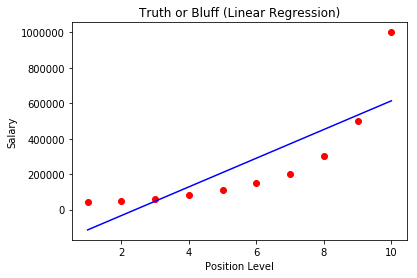

In [12]:
plt.scatter(X,Y,color="red")
plt.plot(X,lin_reg.predict(X),color="blue")
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show

## Observations
Bad model, thus we need to make a better model to make better predicted salaries; this is apparent through the above graph. 

Observing salary for level 6.5, it is 300,000 thousand dollars
- Meaning, if the employee had not mentioned his previous salary is $160,000, then we would have to pay more. 

# Visualising Polynomial Regression Results

- It is not simple to plot in **blue** the linear regression model with the below:
    - ~~plt.plot(X,lin_reg_2.predict(X),color="blue")~~
    - The reason the line of code above is incorrect is due to the object **lin_reg_2** is an object of the linear regression class and not polynomial regression class. 
    - There are no polynomial features with this object
    - Need to get predictions of the polynomial regression model
- Note, I transformed matrix of features X into X_poly containing the position levels
    - Instead of doing the striked-out code above, I inputted the new matrix of features containing the polynomial features

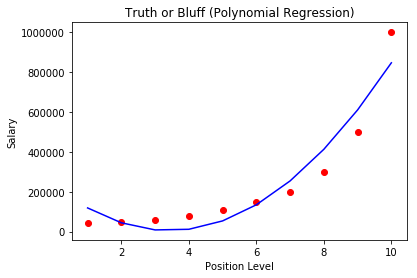

In [14]:
plt.scatter(X,Y,color= "red")
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color="blue")
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Observations
There is no best fitting line, but a curve hence proving again that Polynomial Regression is not linear regression. 

Observing the salary for position level 6.5, and I observe a salary approximately $200,000 which is much better than the linear regression model results. 

I want to improve my Polynomial Regression results even further; I modified the degree of the polynomial regression model. 

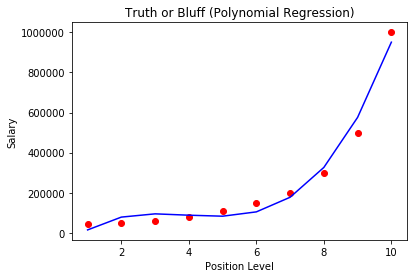

In [17]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly,Y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,Y)

#Visualising again
plt.scatter(X,Y,color= "red")
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color="blue")
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Observation of a Modified Model
This is a polynomial regression model with a degree = 3, it is a better model than before. When observing the position level 6.5, we will see a predicted salary according to our new optimal model; a salary close to the employee's $160,000 previous salary. 

Creating a further better model by increasing the degree of the polynomial regression model:

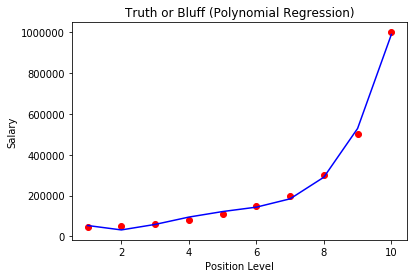

In [18]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly,Y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,Y)

#Visualising again
plt.scatter(X,Y,color= "red")
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color="blue")
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Observations of a Better Model
I can see this polynomial regression model fits the observation data points very well, and thus it would give me an accurate prediction of the salary of a position level of 6.5. This would then tell me if this new employee was telling the truth of its previous salary. 

## More Advanced Plot
Instead of having the position levels from 1-10 incremented by only 1, I want to have predictions from 1 to 10 incremented by a higher resolution; 0.1 step increment. 


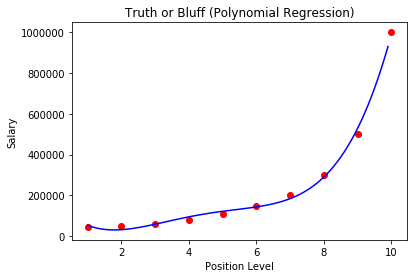

In [19]:
#Specify lower bound and max bound of X
X_grid = np.arange(min(X), max(X),0.1)
#This gives us a vector, but we want a matrix
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X,Y,color= "red")
plt.plot(X_grid,lin_reg_2.predict(poly_reg.fit_transform(X_grid)),color="blue")
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Final Prediction
Predicting a new result with Linear Regression; I can observe that the Polynomial Regression Model fits much better than the Linear Regression model.

Employee previous level 6.5, results with Linear Regression Model shows a salary of $330,000 which is not the best model. 

Afterwards, I wanted to compare this result to a new result with Polynomial Regression model. The results show the salary predicted with this better optimal model is $158,000; thus the employee is truthful. 

In [22]:
print("Linear Regression Model Salary Prediction: ",lin_reg.predict(6.5))
print("Polynomial Regression Model Salary Predictions: ",lin_reg_2.predict(poly_reg.fit_transform(6.5)))

Linear Regression Model Salary Prediction:  [[330378.78787879]]
Polynomial Regression Model Salary Predictions:  [[158862.45265153]]
